# TP - Support Vector Machines & Decision trees Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

clusters_std = [1, 5]
#écart-type de 1
X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=clusters_std[0], center_box=(-10.0, 10.0))

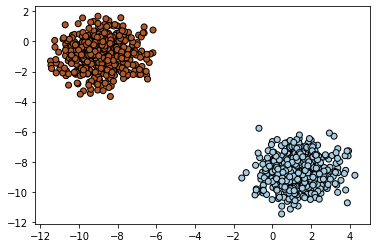

In [2]:
from sklearn import preprocessing
from sklearn import svm

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.86197468, -0.80290362],
       [ 0.98346156, -0.9117297 ],
       [ 0.92985895, -0.66722371],
       ...,
       [-0.5181207 ,  0.96919511],
       [ 1.10764411, -1.43204303],
       [ 0.85365838, -1.22681371]])

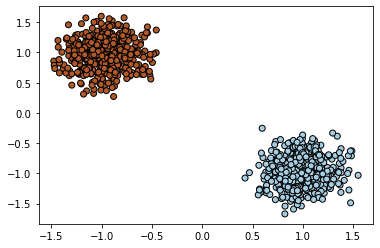

In [23]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')